In [2]:
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib_scalebar.scalebar import ScaleBar
import geopandas as gpd
import matplotlib.colors as mcolors
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp

%load_ext autoreload
%autoreload 2

In [3]:
adata = sc.read_h5ad('../EEL_AnnData/EEL_41CleanNuclei-CellularNgh_FeaturesMN.h5ad') 
                     #EEL_41CleanNuclei-CellularNgh_FeaturesMN.h5ad')

In [4]:
obs = adata.obs

In [6]:
# make font changeable in Illustrator
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style

# By MN

In [7]:
from tqdm import tqdm
'''unique_samples = np.unique(adata_obs.Sample)
mn = []

MN_names = []
for i, grp in  adata_obs.groupby('CombinedNameMerge'):
    print(i)
    if i.count('unknown') == 0:
        MN_names.append(i)
        mn.append([grp.Area[grp.Sample == s].sum() for s in unique_samples])'''
obs['Patient'] = [x[:5] for x in obs['Sample']]
df_table = obs.pivot_table(values='Area', index='Patient', columns='CombinedNameMergeImmune', aggfunc=np.mean)
df_table = df_table.drop(columns=['unknown 1','unknown2 1'])

/tmp/ipykernel_1867186/615680796.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_table = obs.pivot_table(values='Area', index='Patient', columns='CombinedNameMergeImmune', aggfunc=np.mean)
/tmp/ipykernel_1867186/615680796.py:12: FutureWarning: The provided callable <function mean at 0x7f6e5c7594e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_table = obs.pivot_table(values='Area', index='Patient', columns='CombinedNameMergeImmune', aggfunc=np.mean)


In [8]:
order = [
    'AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5', 'AC-like 6', 'AC-like 7',
    'GBL-like 1', 'GBL-like 2',
    'preOPC-like 1', 
    'OPC-like 1', 'OPC-like 2',
    'RG 1', 'RG 2',
    'NPC-like 1', 'NPC-like 2' , 'NPC-like 3',
    'FB-like 1', 'FB-like 2', 'FB-like 3',
    'MES-like 1', 'MES-like 2', 'MES-like 3', 'MES-like 4', 'MES-like 5', 'MES-like 6', 'MES-like 7', 'MES-like 8',
    
    'Mono 1', 'Mono 2',
    'TAM-BDM 1','TAM-BDM 2','TAM-BDM 3','TAM-BDM 4',
    'TAM-MG',
    'DC',
    #'Plasma B 1','Plasma B 2','Plasma B 3',
    'Oligodendrocyte 1','Oligodendrocyte 2',
    'Mural cell 1','Mural cell 2',
    'Endothelial 1',
    'Erythrocyte 1',
    
    
][::-1]
df_table = df_table.loc[:,order]

order = order[::-1]

from sklearn.preprocessing import Normalizer, StandardScaler

#X = np.array(df_table.values)
#X = Normalizer().fit_transform(X)
df_table = df_table.T
df_table = (df_table/df_table.sum(axis=1).values[:,None]) * 100
#scaler = StandardScaler()
#vals = scaler.fit_transform(df_table)
vals = df_table.values
df = pd.DataFrame(data=vals,index=df_table.index, columns= df_table.columns)
df = df.T

In [15]:
df = df.fillna(0)

In [19]:
import scipy.cluster.hierarchy as hc
from scipy.spatial.distance import pdist
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram
import fastcluster

metric='euclidean'
method = 'ward'

#df_means= pd.DataFrame(data=reference_means.X,index=reference_means.obs.annotation )

D = pdist(df.values, metric)
#D = pdist(df.values, metric)
Z = fastcluster.linkage(D, method=method,metric=metric, preserve_input=True)
Z = hc.optimal_leaf_ordering(Z, D, metric=metric)
ordering_sc = hc.leaves_list(Z)
#ordering_sc_str = df.columns[ordering_sc]
ordering_samples = df.index[ordering_sc][::-1]
ordering_samples

Index(['SL016', 'SL020', 'SL029', 'SL061', 'SL035', 'SL037', 'SL057', 'SL046',
       'SL053', 'SL038', 'SL034', 'SL030', 'SL018', 'SL002', 'SL027', 'SL006',
       'SL019', 'SL001', 'SL003', 'SL012', 'SL015', 'SL013', 'SL005', 'SL011',
       'SL023', 'SL040', 'SL047'],
      dtype='object', name='Patient')

In [20]:
order_abb = [
    'AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5', 'AC-like 6', 'AC-like 7',
    'GBL-like 1', 'GBL-like 2',
    'preOPC-like 1', 
    'OPC-like 1', 'OPC-like 2',
    'RG 1', 'RG 2',
    'NPC-like 1', 'NPC-like 2' , 'NPC-like 3',
    'FB-like 1', 'FB-like 2', 'FB-like 3',
    'MES-like 1', 'MES-like 2', 'MES-like 3', 'MES-like 4', 'MES-like 5', 'MES-like 6', 'MES-like 7', 'MES-like 8',
    'Mono 1', 'Mono 2',
    'TAM-MG', 'TAM-MDM 4', 'TAM-MDM 3', 'TAM-MDM 1', 'TAM-MDM 2',
    'DC',
    'OL 1',
    'OL 2',
    'ERY 1',
    'Mural 1','Mural 2',
    'Endo. 1'
][::-1]



In [21]:
df = df.loc[ordering_samples]

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 43 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'Y', 'a', 'd', 'e', 'eight', 'five', 'four', 'hyphen', 'i', 'k', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 'seven', 'six', 'space', 'three', 'two', 'u', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 37, 38, 39, 40, 41, 42, 47, 48, 49, 50, 51, 53, 54, 55, 60, 68, 71, 72, 76, 78, 79, 81, 82, 83, 85, 88]
INFO:fontTools.subset:Closed gly

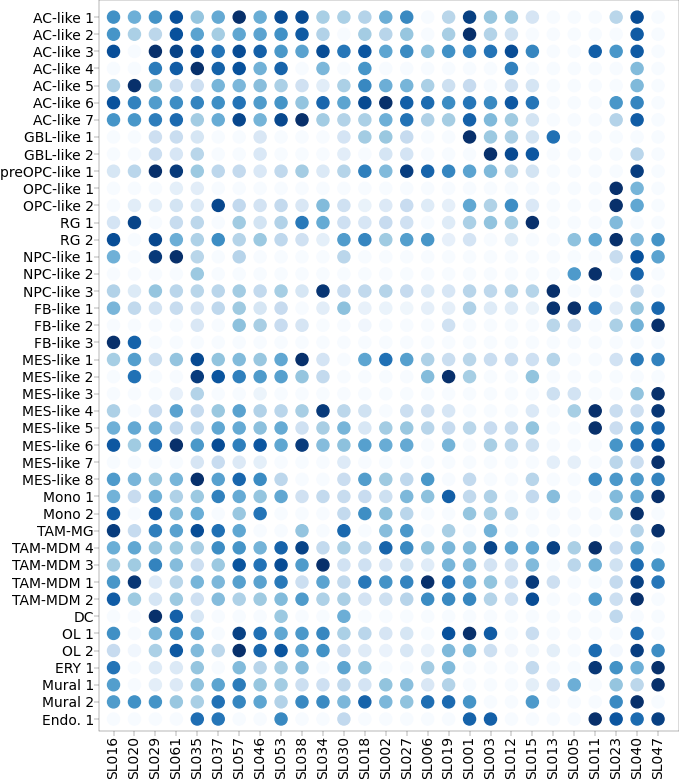

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Create a figure and axis
figsize=(7,8)
fig, ax = plt.subplots(figsize=figsize)

# Set the size of the dots
dot_size = 75

# Iterate over each row and column
for x in df.columns:
    
    vals = df[x].values
    ax.scatter(df.index, [x]*df.index.shape[0] ,s=dot_size, c=vals, cmap='Blues',)#norm=mcolors.CenteredNorm()

# Set the axis limits
ax.set_xlim([-1, 41])
ax.set_ylim([-1, 10])

# Show the colorbar
#cbar = plt.colorbar()
# Set the colorbar label
#cbar.set_label('Values')
ax.set_yticks(range(df.shape[1]), order_abb, rotation=0, fontsize=10)
ax.set_xticks(range(df.shape[0]), df.index, rotation=90, fontsize=10)
#ax.set_yticks(range(df.shape[0]), ['CN'+str(x+1) for x in range(10)], fontsize=10, rotation=0)

ax.set_xlim(-.1*figsize[0], len(df.index))
ax.set_ylim(-.1*figsize[0], len(df.columns))
#plt.axis('off')

#ax.spines[['top','bottom','left','right']].set_visible(False)# Show the plot
plt.tight_layout()
#plt.grid(axis='y')
plt.savefig('figures/MN_Patient.pdf',dpi=600,transparent=True)
plt.show()